# Fast style transfer using TF-Hub
This snippet is based on the following example from tensorflow hub
- https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2

In [1]:
%matplotlib inline

import urllib

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.preprocessing import image

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

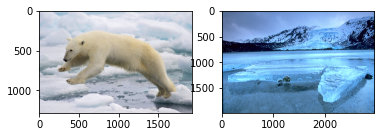

In [2]:
content_image = plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/3/3d/Polar_Bear_AdF.jpg'), format='jpg')
style_image = plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/8/8e/Eyjafjallaj%C3%B6kull.jpeg'), format='jpg')


fig, axs = plt.subplots(1,2)

_ = axs[0].imshow(content_image)
_ = axs[1].imshow(style_image)

In [3]:
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]


In [4]:
np.shape(stylized_image)

TensorShape([1, 1280, 1920, 3])

In [5]:
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
    
  plt.show()

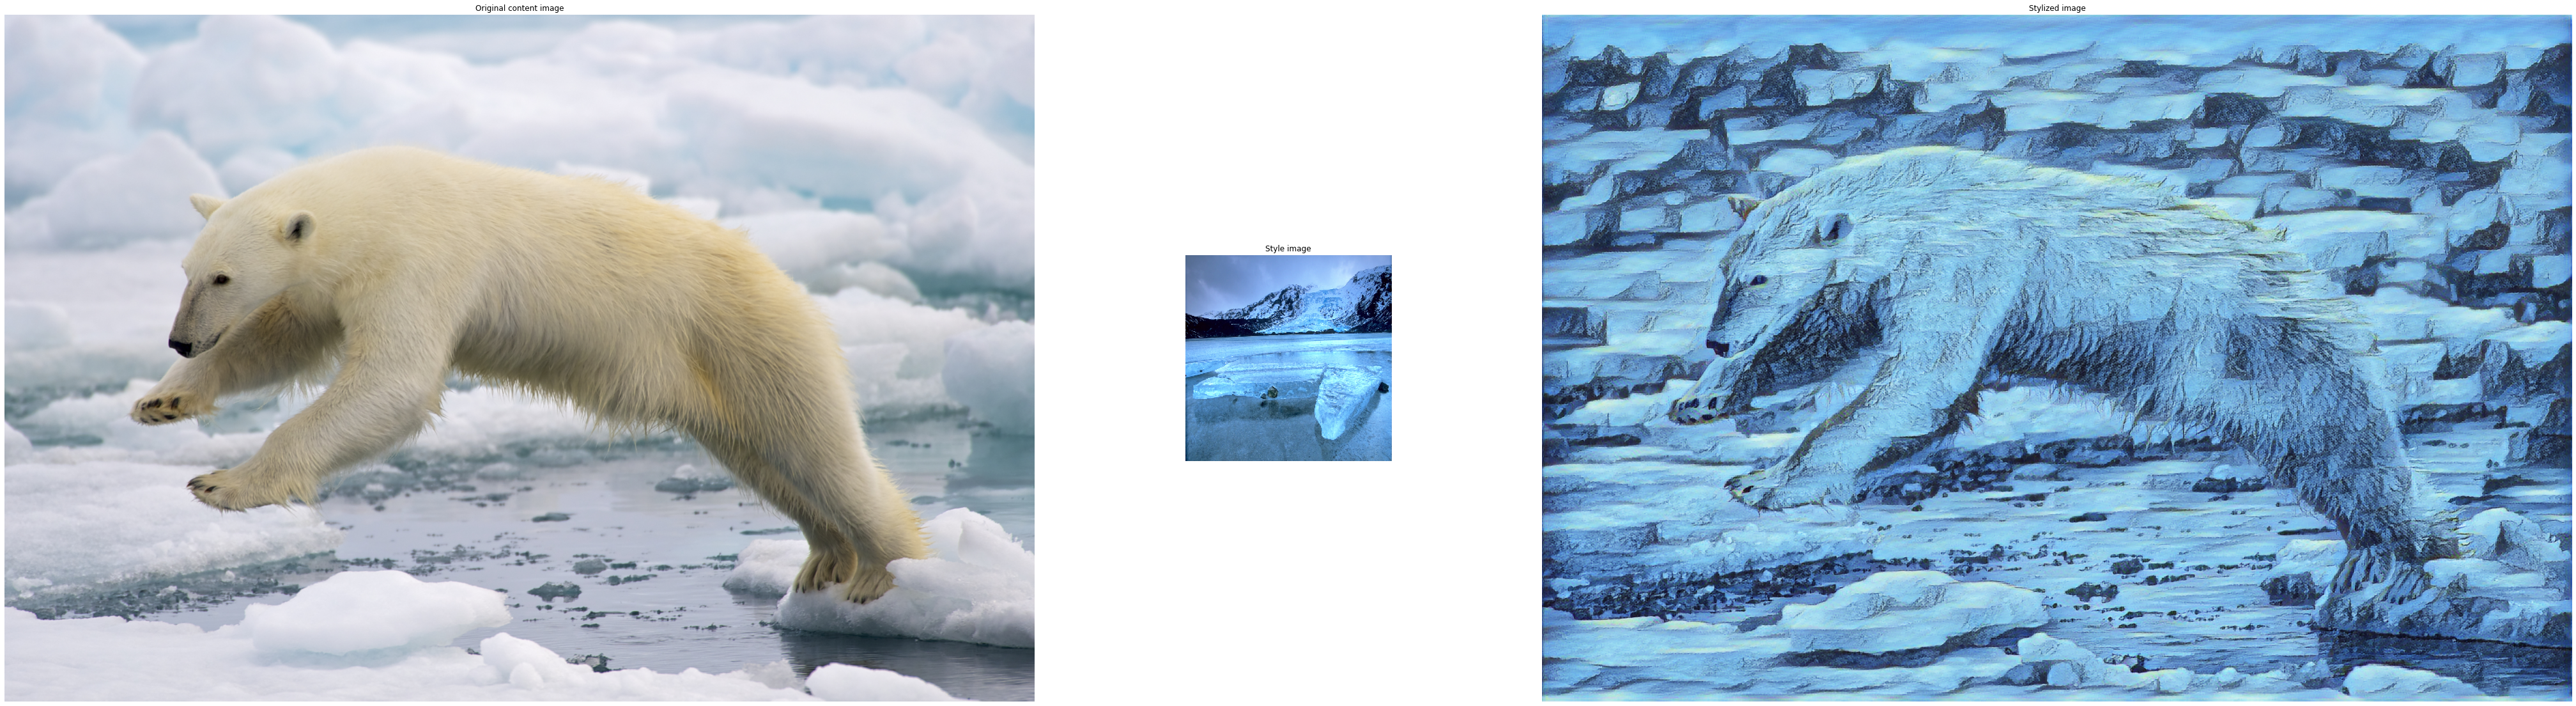

In [6]:
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [7]:
#image.save_img('myfile.jpeg', stylized_image[0])